### HybridSort, MergeSort & InsertionSort

In [72]:
class HybrSort:
    
    # CONSTRUCTOR
    def __init__(self, array=[]):
        self.array = array
        self.count = 0
        
    # MERGE FUNCTION    
    def Merge(self, n, m):
        mid = int((n + m)/2) 
        a = n
        b = m + 1;
        if(m-n) <= 0:
            return 
        while(a <= mid and b <= m):
            if(self.array[a] < self.array[b]): 
                a+=1
            elif(self.array[a] > self.array[b]):
                temp = self.array[b]
                for i in range(b, a, -1):
                    self.array[i] = self.array[i-1]
                self.array[a] = temp
                a+=1
                mid+=1
            else:
                for i in range(b, a, -1):
                    self.array[i] = self.array[i-1]
                self.array[a+1] = self.array[a]
                a+=2
                mid+=1
            self.count += 1 # KEY COMPARISON COUNT
        return
    
    # INSERTION SORT
    def InsertionSort(self, n, m):
        if(n >= m):
            return
        for i in range(n+1, m+1):
            for j in range(i, n, -1):
                if(self.array[j] < self.array[j-1]):
                    self.count += 1 # KEY COMPARISON COUNT
                    temp = self.array[j]
                    self.array[j] = self.array[j-1]
                    self.array[j-1] = self.array[j]
                else:
                    break
        return
    
    # HYBRID SORT
    def HybridSort(self, n, m, s):
        mid = int((n+m)/2)
        if(m-n+1 <= s):
            self.InsertionSort(n, m)
        else:
            self.HybridSort(n, mid, s)
            self.HybridSort(mid+1, m, s)
            self.Merge(n, m)
        return

### Generating arrays of data from CSV files

In [73]:
import pandas as pd
import numpy as np

data1 = pd.read_csv("exampleClass1DatasetSize1000.csv")
data2 = pd.read_csv("exampleClass1DatasetSize10000.csv")
data3 = pd.read_csv("exampleClass1DatasetSize100000.csv")
data4 = pd.read_csv("exampleClass1DatasetSize1000000.csv")
data5 = pd.read_csv("exampleClass1DatasetSize10000000.csv")
data1 = data1[['rand0', 'rand1', 'rand2', 'rand3', 'rand4', 'rand5', 'rand6', 'rand7', 'rand8', 'rand9']]
data2 = data2[['rand0', 'rand1', 'rand2', 'rand3', 'rand4', 'rand5', 'rand6', 'rand7', 'rand8', 'rand9']]
data3 = data3[['rand0', 'rand1', 'rand2', 'rand3', 'rand4', 'rand5', 'rand6', 'rand7', 'rand8', 'rand9']]
data4 = data4[['rand0', 'rand1', 'rand2', 'rand3', 'rand4', 'rand5', 'rand6', 'rand7', 'rand8', 'rand9']]
data5 = data5[['rand0', 'rand1', 'rand2', 'rand3', 'rand4', 'rand5', 'rand6', 'rand7', 'rand8', 'rand9']]
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)
data3 = pd.DataFrame(data3)
data4 = pd.DataFrame(data4)
data5 = pd.DataFrame(data5)
data1 = (np.array(data1.values.tolist())).flatten()
data2 = (np.array(data2.values.tolist())).flatten()
data3 = (np.array(data3.values.tolist())).flatten()
data4 = (np.array(data4.values.tolist())).flatten()
data5 = (np.array(data5.values.tolist())).flatten()

In [74]:
# Theoretical S size is approx 7
# Data1
hs = HybrSort()
hs.array = data1
hs.HybridSort(0, len(data1)-1, 7)
count1 = hs.count
# Data2
hs.count = 0
hs.array = data2
hs.HybridSort(0, len(data2)-1, 7)
count2 = hs.count
# Data3
hs.count = 0
hs.array = data3
hs.HybridSort(0, len(data3)-1, 7)
count3 = hs.count
# Data4
hs.count = 0
hs.array = data4
hs.HybridSort(0, len(data4)-1, 7)
count4 = hs.count
# Data5
hs.count = 0
hs.array = data5
hs.HybridSort(0, len(data5)-1, 7)
count5 = hs.count
print(count1, count2, count3, count4, count5)

5373 59683 530391 5308626 59003572


Text(0, 0.5, 'Number Of Key Comparisons')

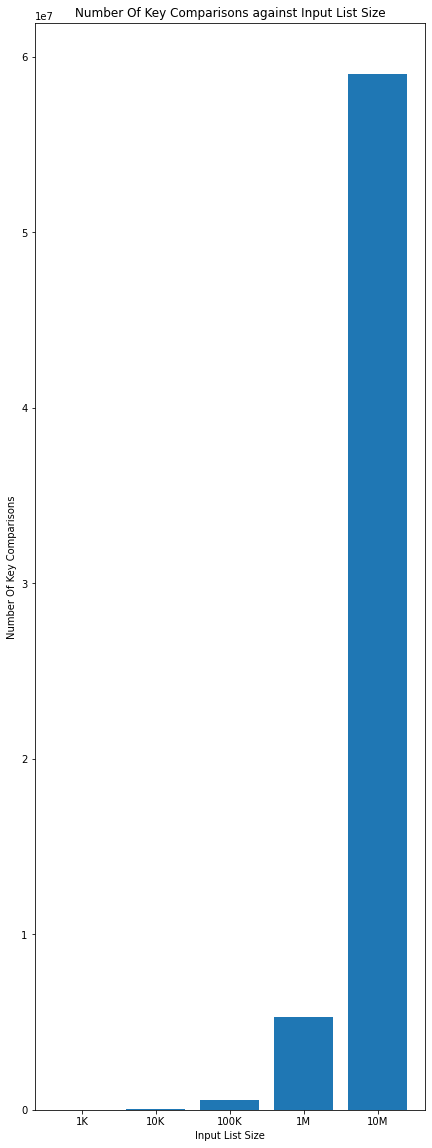

In [75]:
import matplotlib.pyplot as plt
ds = ['1K', '10K', '100K', '1M', '10M']
kc = [count1, count2, count3, count4, count5]
plt.figure(figsize=(7, 20))
plt.bar(ds, kc)
plt.title("Number Of Key Comparisons against Input List Size")
plt.xlabel("Input List Size")
plt.ylabel("Number Of Key Comparisons")